<a href="https://colab.research.google.com/github/OlyMahmudMugdho/supervised-learning-notes/blob/main/decision_tree_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_titanic_dataset_path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Data source import complete.')


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Data source import complete.


In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
# 2. Load Dataset
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [4]:
# 3. Data Preprocessing
df.columns = df.columns.str.strip()  # remove whitespace
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary columns
cols_to_drop = [col for col in ['Name', 'Ticket', 'Cabin'] if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [5]:
# 4. Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [6]:
# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# 6. Train Decision Tree
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# 7. Predictions
y_pred = dtree.predict(X_test)
y_proba = dtree.predict_proba(X_test)[:,1]

In [9]:
# 8. Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



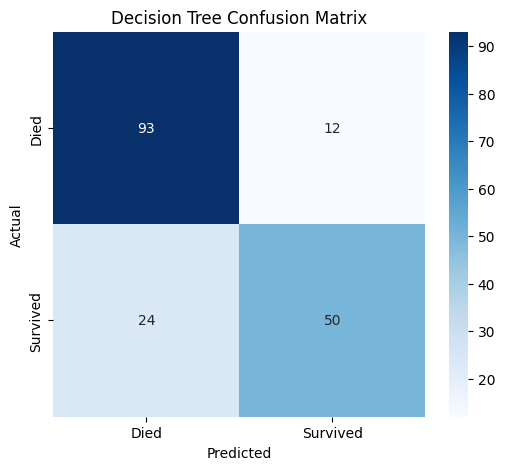

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

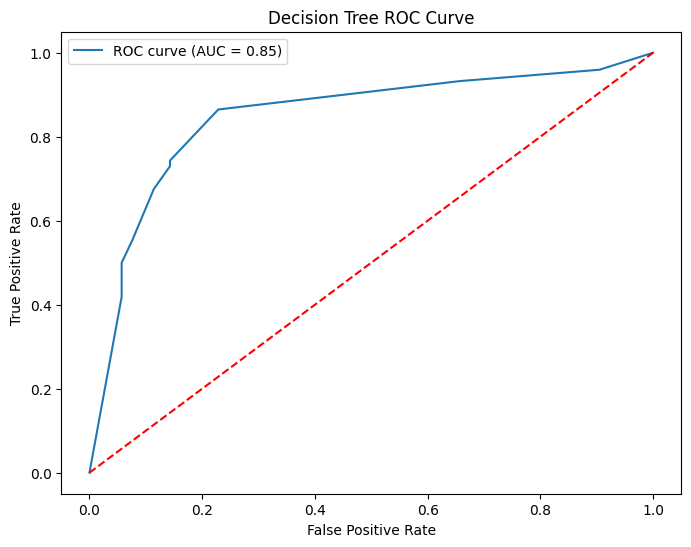

In [11]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend()
plt.show()

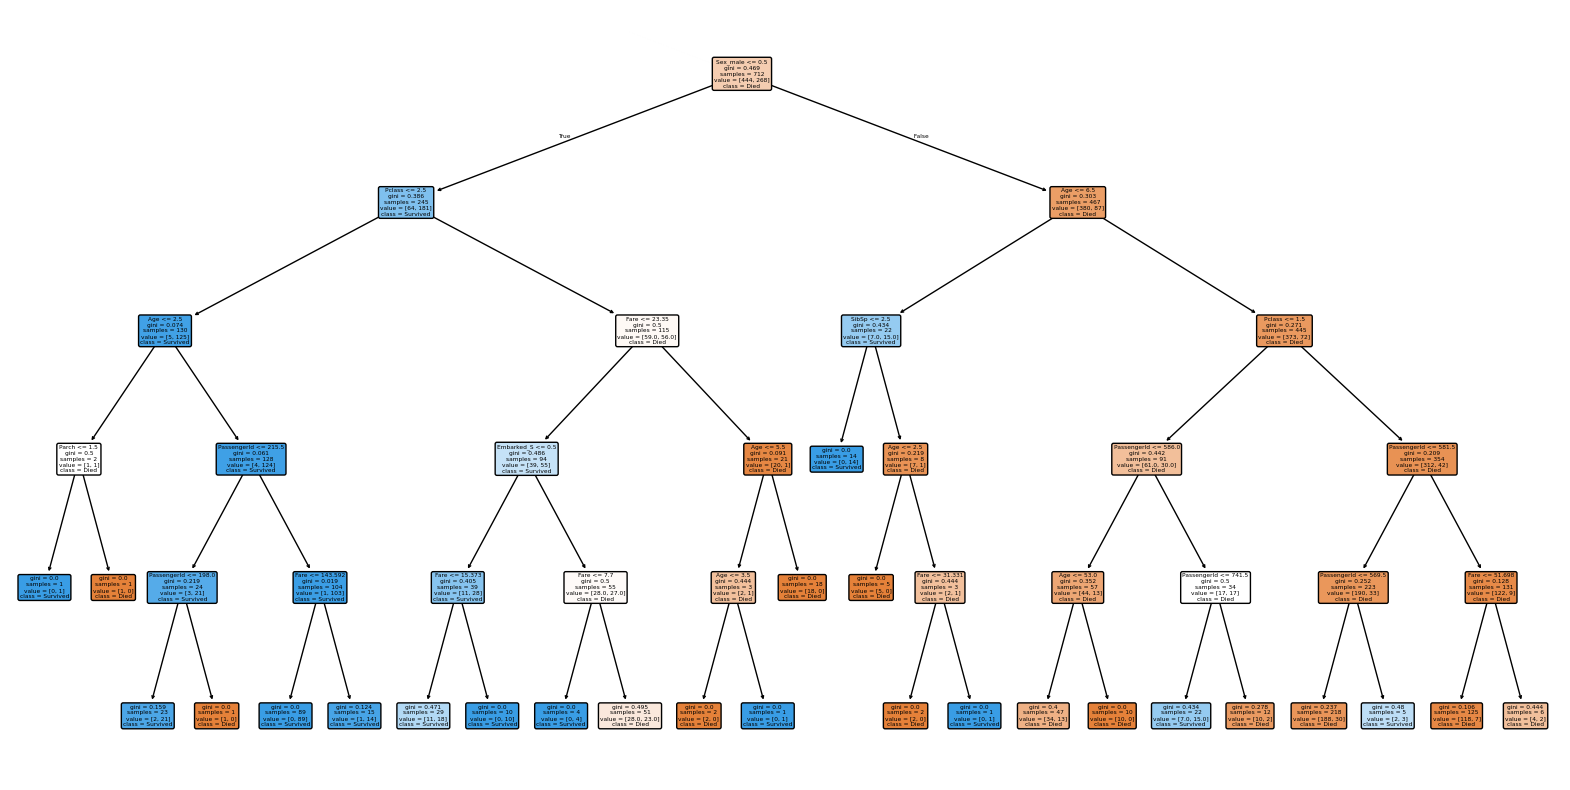

In [12]:
# 9. Visualize the Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=["Died","Survived"], filled=True, rounded=True)
plt.show()